In [1]:
import matplotlib.pyplot as plt
from hsolver.hamiltonian import Hamiltonian
from hsolver.collections import Spin, Oscillator, SpinFieldInteractionHamiltonian, MSGateHamiltonian
from hsolver.solver import SystemEvolutionSolver

Initialize spins and their common vibration modes

In [2]:
spin1 = Spin(frequency=1.)
spin2 = Spin(frequency=1.)
vibration1 = Oscillator(dim=10, frequency=1.)
vibration2 = Oscillator(dim=10, frequency=1.4, offset=10)

Initialize fields

In [3]:
field_blue = SpinFieldInteractionHamiltonian.FieldParameters(
    frequency=0.9 * vibration1.frequency
)
field_red = SpinFieldInteractionHamiltonian.FieldParameters(
    frequency=-0.9 * vibration1.frequency
)

Create hamiltonian in the spin-interaction picture

In [4]:
# Create empty hamiltonian
hamiltonian = Hamiltonian([spin1, spin2, vibration1, vibration2])

# Add MS interaction with 1-st vibration mode
hamiltonian.add(MSGateHamiltonian(
    spin1,
    spin2,
    vibration1,
    field_blue=field_blue,
    field_red=field_red,
    spin_field=SpinFieldInteractionHamiltonian.InteractionParameters(
        rabi_frequency=0.1,
        ld_param=0.1
    )
))

# Add MS interaction with 2-nd vibration mode
hamiltonian.add(MSGateHamiltonian(
    spin1,
    spin2,
    vibration2,
    field_blue=field_blue,
    field_red=field_red,
    spin_field=SpinFieldInteractionHamiltonian.InteractionParameters(
        rabi_frequency=0.1,
        ld_param=0.01
    )
))

# We need spin-related interaction picture
hamiltonian.use_h0([vibration1, vibration2]);

Initialize solver

In [5]:
solver = SystemEvolutionSolver(
    hamiltonian=hamiltonian,
    init_state=[spin1.basis_state(0), spin2.basis_state(0), vibration1.basis_state(0), vibration2.basis_state(14)],
    max_step_size=1.,
    min_step_size=0.2
)

Solve in $t\in[0,1000]$ time interval

In [6]:
solver.solve(time_stop=1000.);

===> TIME INTERVAL 1/1
* t_start = 0.0000e+00, t_stop = 1.0000e+03
* Periodic hamiltonian (period: 6.9813e+00) => using Floquet method
* Solving for single period: 100% (35 steps)
* Repeat unitary: 100% (4979 steps)


Plot results

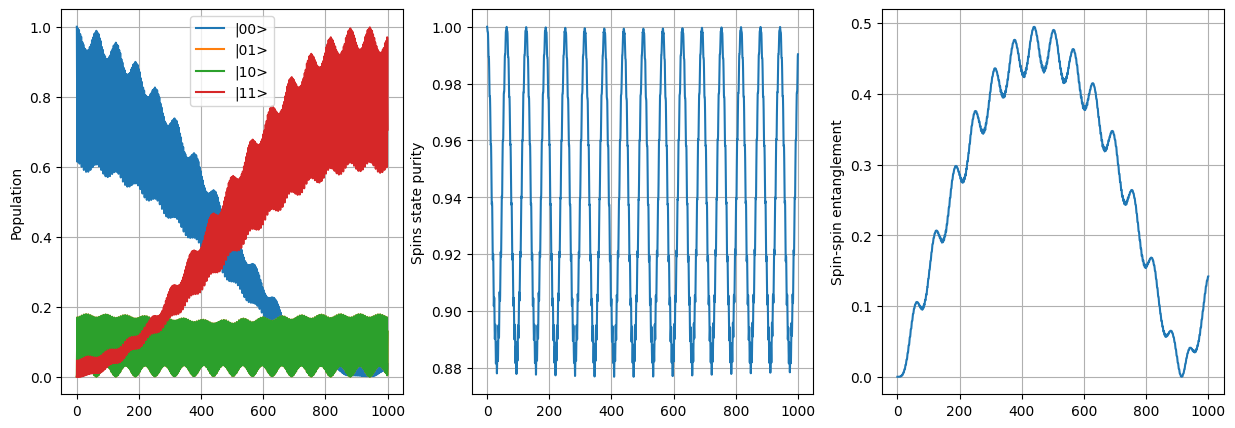

In [7]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

population = solver.get_populations_evolution([spin1, spin2])
labels = ["|00>", "|01>", "|10>", "|11>"]
for label, level_population in zip(labels, population):
    ax1.plot(solver.time_list, level_population, label=label)
ax1.grid()
ax1.legend()
ax1.set_ylabel("Population")

purity = solver.get_purity_evolution([spin1, spin2])
ax2.plot(solver.time_list, purity)
ax2.grid()
ax2.set_ylabel("Spins state purity")

negativity = solver.get_entanglement_evolution([spin1], [spin2])
ax3.plot(solver.time_list, negativity)
ax3.grid()
ax3.set_ylabel("Spin-spin entanglement")

plt.show()